# LunchPy workshop - Exploratory Data Analysis with Pandas and Seaborn

The Pandas library provides easy-to-use data structures and data analysis tools.

### Contents
* Pandas Series
* Pandas DataFrame
* EDA: Describe the DataFrame
* EDA: Plot a variable  
* EDA: Check correlation

_Note: "EDA: Plot two variables" (Will be covered in #5 visualisation workshop)_
### Demo
* Titanic Data Exploration

### Q&A during the workshop

* Q: 





### A quick way to check documentation

In [20]:
help(pd.read_csv)

### Pandas Series
* A one-dimensional labeled array capable of holding any data type 
* Index and values

In [2]:
# Import pandas library
import pandas as pd

In [9]:
# Initiate a pandas series with a list of values and a list of indices. By default, the index is 0, 1, 2...
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])

In [16]:
# Get index
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [14]:
# Get values
s.values

array([ 3, -5,  7,  4])

### Pandas DataFrame
* A two-dimensional labeled data structure with columns of potentially different types
* DataFrame consists of one or more Series
* DataFrame can be created from a dictionary, multiple pandas series or a csv/excel file

In [107]:
# Initiate a pandas dataframe with a dictionary
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]}
    
df = pd.DataFrame(data)
df

,Capital,Country,Population
0,Brussels,Belgium,11190846
1,New Delhi,India,1303171035
2,Brasília,Brazil,207847528


In [7]:
# Initiate a pandas dataframe with multiple pandas series
s_country = pd.Series(['Belgium', 'India', 'Brazil'])
s_capital = pd.Series(['Brussels', 'New Delhi', 'Brasília'])
s_population = pd.Series([11190846, 1303171035, 207847528])

df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [10]:
# Read csv as a dataframe
pd.read_csv('file.csv', header=None, nrows=5)
# Export a dataframe to csv
df.to_csv('myDataFrame.csv')

In [ ]:
# Read excel as a dataframe, by default, the first sheet will be read as a dataframe. 
# can use 'sheet_name' to specify the sheet to read. http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_excel.html
pd.read_excel('file.xlsx')

# Export multiple dataframes to multiple sheets in an excel file
writer = pd.ExcelWriter('output.xlsx')
df1.to_excel(writer,'Sheet1')
df2.to_excel(writer,'Sheet2')
writer.save()

In [18]:
# Get index
df.index

RangeIndex(start=0, stop=3, step=1)

In [17]:
# Get column names
df.columns

Index(['Capital', 'Country', 'Population'], dtype='object')

### EDA: Describe the DataFrame
* shape, info(), describe()

In [28]:
# Get number of rows and columns
df.shape

(3, 3)

In [36]:
# Get the contents. It shows the number of non-missing values for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Capital       3 non-null object
Country       3 non-null object
Population    3 non-null int64
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [31]:
# Describe the numeric columns
df.describe()

,Population
count,3.000000e+00
mean,5.074031e+08
std,6.961346e+08
min,1.119085e+07
25%,1.095192e+08
50%,2.078475e+08
75%,7.555093e+08
max,1.303171e+09


In [27]:
# Describe object columns
df.describe(include = ['O'])

,Capital,Country
count,3,3
unique,3,3
top,Brasília,India
freq,1,1


In [32]:
# Include all the columns
df.describe(include='all')

,Capital,Country,Population
count,3,3,3.000000e+00
unique,3,3,NaN
top,Brasília,India,NaN
freq,1,1,NaN
mean,NaN,NaN,5.074031e+08
std,NaN,NaN,6.961346e+08
min,NaN,NaN,1.119085e+07
25%,NaN,NaN,1.095192e+08
50%,NaN,NaN,2.078475e+08
75%,NaN,NaN,7.555093e+08


In [38]:
# Number of non-NA values
df.count()

Capital       3
Country       3
Population    3
dtype: int64

In [43]:
# Missing percentage summary
df.isnull().sum()/df.shape[0]

Capital       0.0
Country       0.0
Population    0.0
dtype: float64

### EDA: Plot a variable
* Numeric columns: pandas histgram or seaborn distplot 
* Categorical columns: pandas barplot with value_counts or seaborn countplot

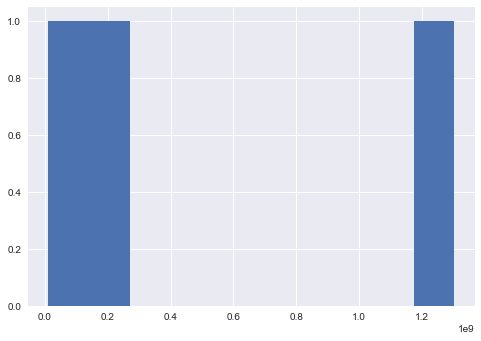

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
# Numeric column with pandas histgram
df['Population'].hist()
plt.show()

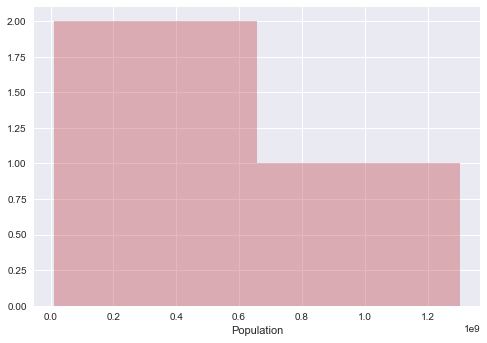

In [60]:
# Numeric column with seaborn distplot
sns.distplot(df['Population'], kde = False)
plt.show()

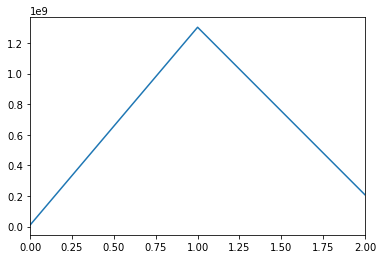

In [52]:
# Note: Lineplot could be misleading when the index is integer but x-axis is continuous 
df['Population'].plot.line()
plt.show()

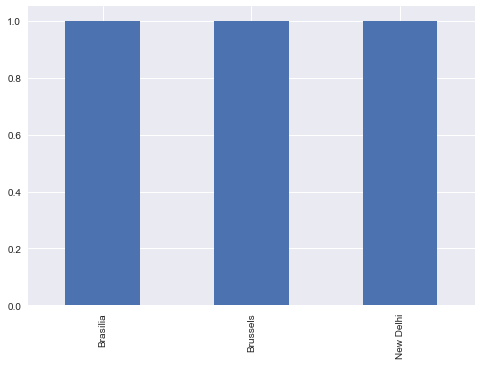

In [111]:
# Categorical column using pandas barplot
df['Capital'].value_counts().plot.bar()
plt.show()

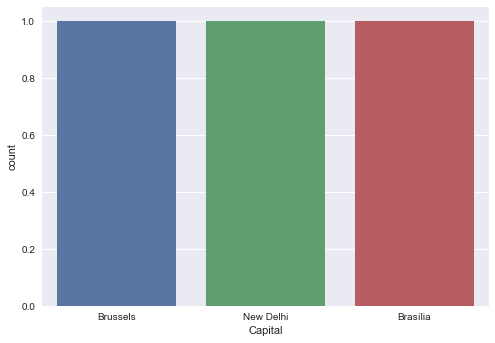

In [56]:
# Categorical column using seaborn countplot
sns.countplot(df['Capital'])
plt.show()

### EDA: Correlation

In [68]:
# Turn categorical columns into numeric ones for correlation demo
from sklearn.preprocessing import LabelEncoder
labelenc_ctr = LabelEncoder()
df['Country'] = labelenc_ctr.fit_transform(df['Country'])

labelenc_cap = LabelEncoder()
df['Capital'] = labelenc_cap.fit_transform(df['Capital'])

df

,Capital,Country,Population
0,1,0,11190846
1,2,2,1303171035
2,0,1,207847528


In [62]:
df.corr()

,Capital,Country,Population
Capital,1.000000,0.500000,0.786718
Country,0.500000,1.000000,0.927967
Population,0.786718,0.927967,1.000000


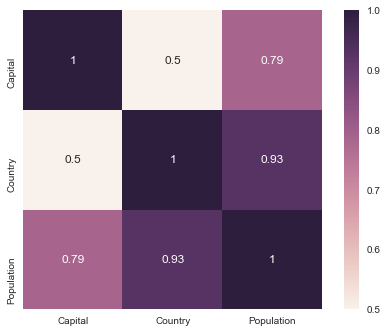

In [67]:
# Recommend to use Seaborn heatmap to plot correlation
sns.heatmap(df.corr(), square = True, annot = True)
plt.show()

### EDA: Plot two variables
_Will be covered in #5 visualisation workshop_

_Pandas plotting functions_
* df.plot.scatter()
* df.plot.hex()
* df.plot.bar(stacked=True)
* pd.plotting.parallel_coordinates

_Seaborn_
* sns.jointplot()
* sns.violinplot()
* sns.boxplot()
* sns.heatmap()

_Faceting_
* sns.FacetGrid()
* sns.pairplot()

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()
list(iris.target_names)
iris.data.shape

(150, 4)

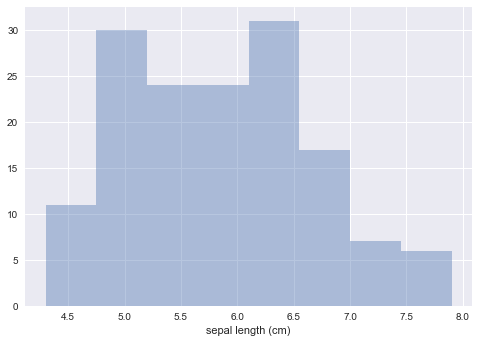

In [131]:
import numpy as np
df = pd.DataFrame(np.concatenate((iris.data, iris.target.reshape(-1,1)), axis=1)
             , columns = np.append(iris.feature_names, 'target'))
sns.distplot(df['sepal length (cm)'], kde = False)
plt.show()

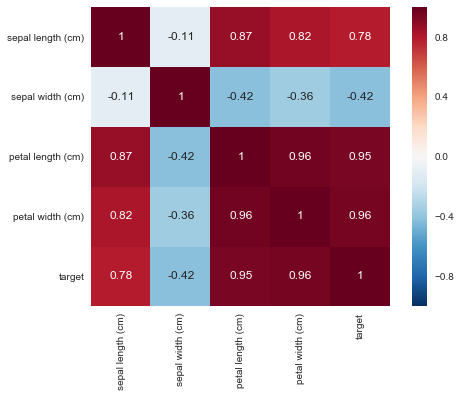

In [132]:
sns.heatmap(df.corr(), square = True, annot = True)
plt.show()